In [175]:
import pandas as pd
#remove default columns limit from pandas
pd.set_option('max_columns',None,'max_rows',None)

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error,r2_score

from xgboost import XGBRegressor
import math


In [2]:
one_year_stat = pd.read_csv('Dataset/one_year_stats',index_col=0)
one_year_stat.head()

,Name,AAV,Player_id,Position,Contract_Begin,assists,blocks,box_plus_minus,defensive_rebounds,field_goal_attempts,field_goal_percentage,field_goals,free_throw_attempts,free_throw_percentage,free_throws,games_played,games_started,height,lost_ball_turnovers,minutes_played,net_plus_minus,offensive_rebounds,personal_fouls,player_efficiency_rating,points,shooting_fouls,steals,three_point_attempts,three_point_percentage,three_pointers,total_rebounds,true_shooting_percentage,turnovers,two_point_attempts,two_pointers,usage_percentage,value_over_replacement_player,weight
0,Steven Adams,17500000,adamsst01,Center,2020,146.0,67.0,2.9,376.0,478.0,0.592,283.0,201.0,0.582,117.0,63.0,63.0,6-11,NaN,1680.0,NaN,207.0,122.0,20.5,684.0,NaN,51.0,3.0,0.333,1.0,583.0,0.604,94.0,475.0,282.0,17.3,2.1,265
1,Arron Afflalo,12500000,afflaar01,Shooting Guard,2015,129.0,7.0,-2.5,220.0,884.0,0.424,375.0,198.0,0.843,167.0,78.0,72.0,6-5,NaN,2502.0,NaN,27.0,167.0,10.7,1035.0,NaN,41.0,333.0,0.354,118.0,247.0,0.533,116.0,551.0,257.0,19.0,-0.3,210
2,Arron Afflalo,8000000,afflaar01,Shooting Guard,2014,248.0,3.0,-0.2,230.0,1011.0,0.459,464.0,336.0,0.815,274.0,73.0,73.0,6-5,NaN,2552.0,NaN,32.0,136.0,16.0,1330.0,NaN,35.0,300.0,0.427,128.0,262.0,0.574,146.0,711.0,336.0,23.3,1.1,210
3,Alexis Ajinca,5050000,ajincal01,Center,2014,40.0,46.0,-2.6,183.0,249.0,0.546,136.0,67.0,0.836,56.0,56.0,30.0,7-2,NaN,951.0,NaN,94.0,187.0,14.6,328.0,NaN,23.0,1.0,0.000,0.0,277.0,0.589,63.0,248.0,136.0,16.3,-0.1,248
4,Cole Aldrich,7300000,aldrico01,Center,2015,75.0,65.0,0.3,237.0,301.0,0.478,144.0,64.0,0.781,50.0,61.0,16.0,6-11,NaN,976.0,NaN,101.0,122.0,18.1,338.0,NaN,37.0,0.0,NaN,0.0,338.0,0.513,59.0,301.0,144.0,18.3,0.6,250


In [3]:
one_year_stat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 534 entries, 0 to 533
Data columns (total 38 columns):
Name                             534 non-null object
AAV                              534 non-null int64
Player_id                        534 non-null object
Position                         534 non-null object
Contract_Begin                   534 non-null int64
assists                          528 non-null float64
blocks                           528 non-null float64
box_plus_minus                   528 non-null float64
defensive_rebounds               528 non-null float64
field_goal_attempts              528 non-null float64
field_goal_percentage            528 non-null float64
field_goals                      528 non-null float64
free_throw_attempts              528 non-null float64
free_throw_percentage            527 non-null float64
free_throws                      528 non-null float64
games_played                     528 non-null float64
games_started                    528 n

## Feature Selection with Pearson Correlation

In [4]:
one_year_stat.head()

,Name,AAV,Player_id,Position,Contract_Begin,assists,blocks,box_plus_minus,defensive_rebounds,field_goal_attempts,field_goal_percentage,field_goals,free_throw_attempts,free_throw_percentage,free_throws,games_played,games_started,height,lost_ball_turnovers,minutes_played,net_plus_minus,offensive_rebounds,personal_fouls,player_efficiency_rating,points,shooting_fouls,steals,three_point_attempts,three_point_percentage,three_pointers,total_rebounds,true_shooting_percentage,turnovers,two_point_attempts,two_pointers,usage_percentage,value_over_replacement_player,weight
0,Steven Adams,17500000,adamsst01,Center,2020,146.0,67.0,2.9,376.0,478.0,0.592,283.0,201.0,0.582,117.0,63.0,63.0,6-11,NaN,1680.0,NaN,207.0,122.0,20.5,684.0,NaN,51.0,3.0,0.333,1.0,583.0,0.604,94.0,475.0,282.0,17.3,2.1,265
1,Arron Afflalo,12500000,afflaar01,Shooting Guard,2015,129.0,7.0,-2.5,220.0,884.0,0.424,375.0,198.0,0.843,167.0,78.0,72.0,6-5,NaN,2502.0,NaN,27.0,167.0,10.7,1035.0,NaN,41.0,333.0,0.354,118.0,247.0,0.533,116.0,551.0,257.0,19.0,-0.3,210
2,Arron Afflalo,8000000,afflaar01,Shooting Guard,2014,248.0,3.0,-0.2,230.0,1011.0,0.459,464.0,336.0,0.815,274.0,73.0,73.0,6-5,NaN,2552.0,NaN,32.0,136.0,16.0,1330.0,NaN,35.0,300.0,0.427,128.0,262.0,0.574,146.0,711.0,336.0,23.3,1.1,210
3,Alexis Ajinca,5050000,ajincal01,Center,2014,40.0,46.0,-2.6,183.0,249.0,0.546,136.0,67.0,0.836,56.0,56.0,30.0,7-2,NaN,951.0,NaN,94.0,187.0,14.6,328.0,NaN,23.0,1.0,0.000,0.0,277.0,0.589,63.0,248.0,136.0,16.3,-0.1,248
4,Cole Aldrich,7300000,aldrico01,Center,2015,75.0,65.0,0.3,237.0,301.0,0.478,144.0,64.0,0.781,50.0,61.0,16.0,6-11,NaN,976.0,NaN,101.0,122.0,18.1,338.0,NaN,37.0,0.0,NaN,0.0,338.0,0.513,59.0,301.0,144.0,18.3,0.6,250


In [232]:
# subset of the data for corelation check

# removing Name,Player_id, and target variable
subset_df = one_year_stat.drop(['Name','Player_id'],axis=1)

In [233]:
subset_df.corr()

,AAV,Contract_Begin,assists,blocks,box_plus_minus,defensive_rebounds,field_goal_attempts,field_goal_percentage,field_goals,free_throw_attempts,free_throw_percentage,free_throws,games_played,games_started,lost_ball_turnovers,minutes_played,net_plus_minus,offensive_rebounds,personal_fouls,player_efficiency_rating,points,shooting_fouls,steals,three_point_attempts,three_point_percentage,three_pointers,total_rebounds,true_shooting_percentage,turnovers,two_point_attempts,two_pointers,usage_percentage,value_over_replacement_player,weight
AAV,1.000000,0.309828,0.451367,0.261941,0.617525,0.443436,0.576787,0.219401,0.611334,0.592333,0.087008,0.590256,0.137240,0.451489,NaN,0.438327,NaN,0.163359,0.229595,0.598424,0.632721,NaN,0.404388,0.392246,0.140207,0.393170,0.380501,0.326566,0.545749,0.494616,0.531371,0.514883,0.675215,0.091555
Contract_Begin,0.309828,1.000000,0.022541,0.032547,0.061541,0.098622,0.066874,0.078076,0.083506,-0.010126,0.041054,-0.007591,0.029124,0.056757,NaN,0.020919,NaN,-0.000432,0.040799,0.049951,0.088304,NaN,0.009205,0.231148,0.178319,0.227565,0.072980,0.198199,-0.013025,-0.050456,-0.002275,0.007581,0.037841,-0.046723
assists,0.451367,0.022541,1.000000,-0.046667,0.507000,0.286746,0.648479,-0.055875,0.610599,0.564552,0.215174,0.595434,0.342497,0.489115,NaN,0.611974,NaN,-0.087796,0.293921,0.447039,0.641997,NaN,0.641408,0.480732,0.212955,0.456857,0.184781,0.115513,0.843010,0.533025,0.503108,0.466148,0.625499,-0.350153
blocks,0.261941,0.032547,-0.046667,1.000000,0.324758,0.686575,0.230045,0.533771,0.336945,0.340687,-0.276148,0.255001,0.308793,0.384204,NaN,0.326150,NaN,0.727877,0.522544,0.404965,0.271064,NaN,0.105520,-0.233017,-0.349366,-0.234932,0.739567,0.245698,0.224768,0.423400,0.487331,0.049052,0.339434,0.564334
box_plus_minus,0.617525,0.061541,0.507000,0.324758,1.000000,0.507855,0.563153,0.426490,0.616514,0.638676,0.185610,0.637078,0.254222,0.411077,NaN,0.456388,NaN,0.227639,0.255121,0.878844,0.641576,NaN,0.490159,0.336832,0.170029,0.346761,0.448620,0.636594,0.563886,0.509715,0.557291,0.520817,0.861611,0.124727
defensive_rebounds,0.443436,0.098622,0.286746,0.686575,0.507855,1.000000,0.595806,0.444113,0.670508,0.636027,-0.132902,0.561321,0.511747,0.634998,NaN,0.668235,NaN,0.745265,0.666481,0.553012,0.628150,NaN,0.409433,0.105010,-0.191252,0.096499,0.977444,0.308496,0.570817,0.685210,0.726929,0.270601,0.602902,0.462714
field_goal_attempts,0.576787,0.066874,0.648479,0.230045,0.563153,0.595806,1.000000,0.077614,0.977222,0.805123,0.297345,0.828984,0.563504,0.681363,NaN,0.864949,NaN,0.228679,0.551895,0.596414,0.980144,NaN,0.665222,0.622692,0.152900,0.602951,0.514156,0.241719,0.835789,0.890841,0.860396,0.703601,0.701852,-0.023030
field_goal_percentage,0.219401,0.078076,-0.055875,0.533771,0.426490,0.444113,0.077614,1.000000,0.246254,0.253539,-0.325353,0.166602,0.225718,0.204166,NaN,0.158043,NaN,0.583509,0.331119,0.568312,0.176926,NaN,0.000455,-0.325193,-0.241728,-0.293797,0.514082,0.742262,0.134293,0.286015,0.408735,0.013084,0.270836,0.523263
field_goals,0.611334,0.083506,0.610599,0.336945,0.616514,0.670508,0.977222,0.246254,1.000000,0.832568,0.221728,0.834733,0.559534,0.702479,NaN,0.853624,NaN,0.342069,0.575839,0.679827,0.984742,NaN,0.632523,0.515985,0.089535,0.505558,0.605454,0.340092,0.831428,0.924271,0.928436,0.688438,0.754311,0.080823
free_throw_attempts,0.592333,-0.010126,0.564552,0.340687,0.638676,0.636027,0.805123,0.253539,0.832568,1.000000,0.119999,0.980662,0.398991,0.562659,NaN,0.680925,NaN,0.369116,0.483953,0.721375,0.877089,NaN,0.572923,0.350313,-0.022540,0.329823,0.588457,0.341261,0.817257,0.804928,0.812207,0.673601,0.791724,0.130797


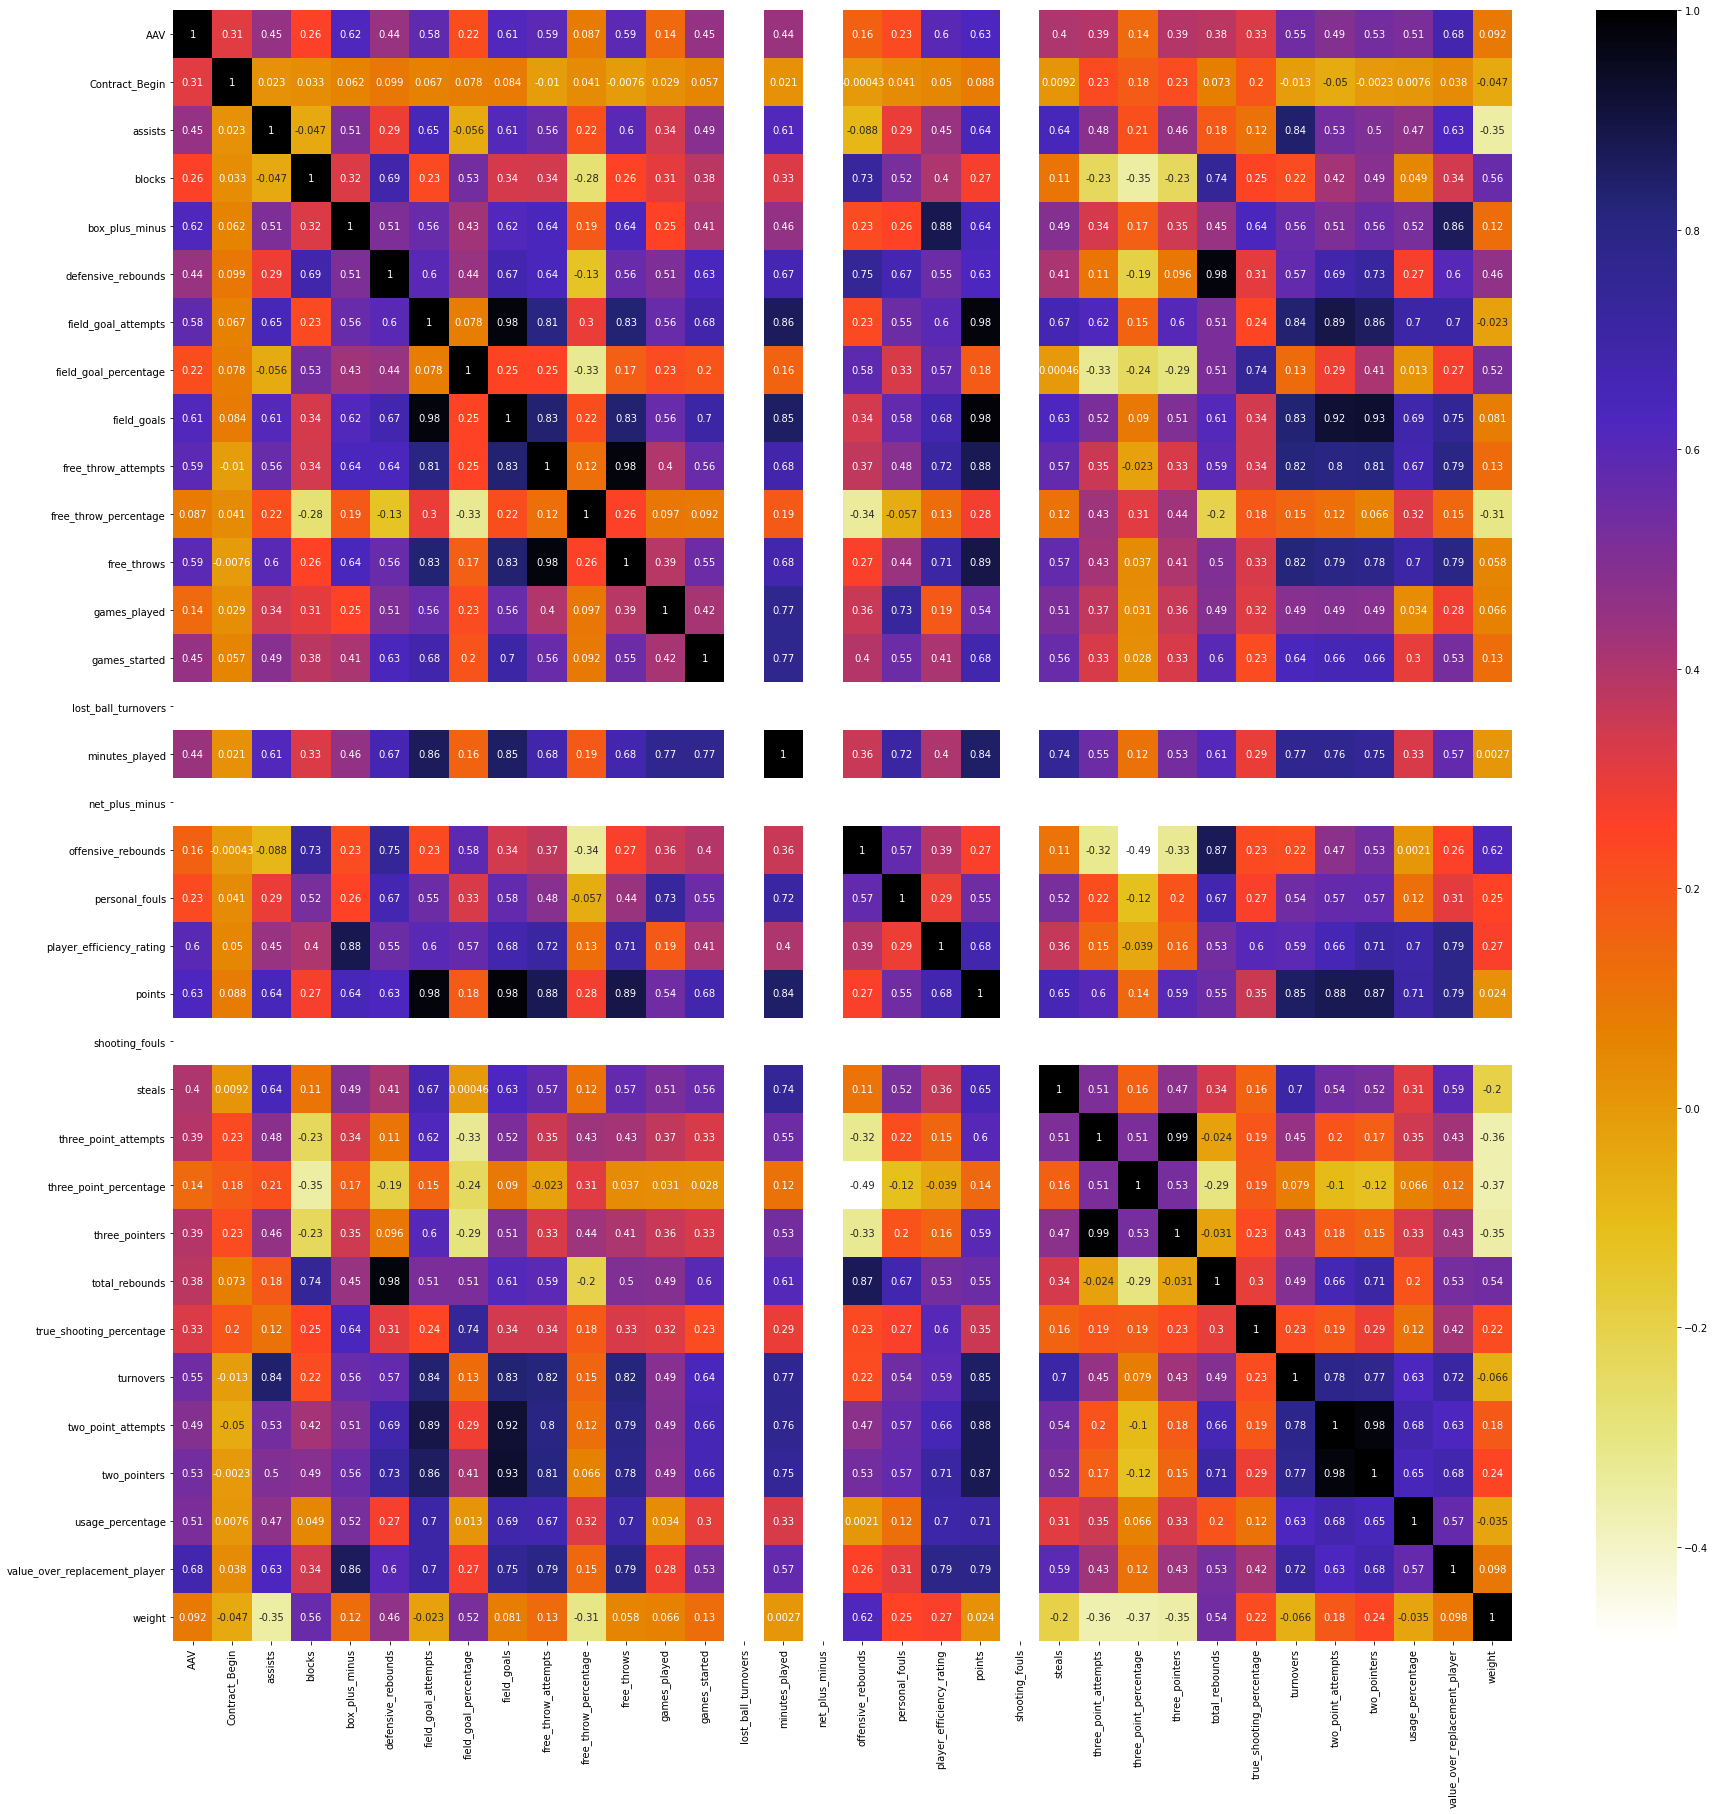

In [234]:
# correlation heatmap // remove if r > 0.7

plt.figure(figsize=(30,30))
sns.heatmap(subset_df.corr(),annot=True,cmap=plt.cm.CMRmap_r)
plt.show()

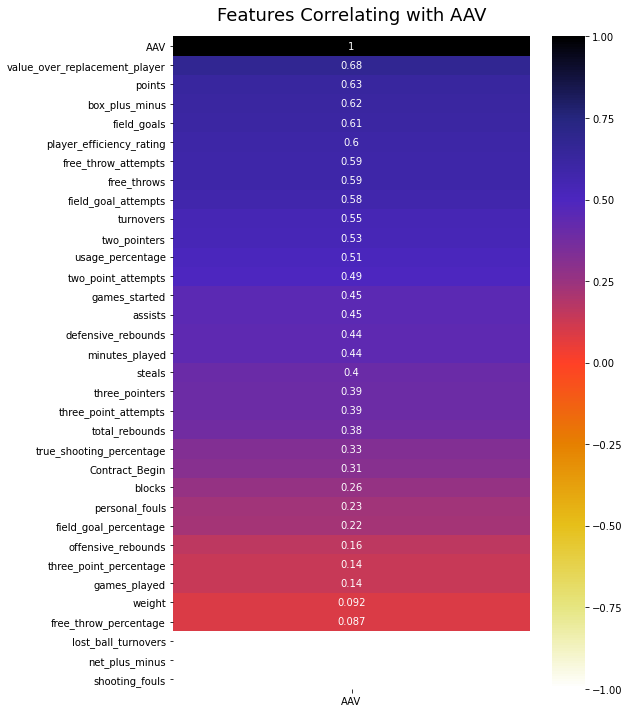

In [348]:
plt.figure(figsize=(8, 12))

heatmap = sns.heatmap(subset_df.corr()[['AAV']].sort_values(by='AAV', ascending=False), vmin=-1, vmax=1, annot=True, cmap=plt.cm.CMRmap_r)
heatmap.set_title('Features Correlating with AAV', fontdict={'fontsize':18}, pad=16)

plt.savefig('feature_correlation_W_AAV');

In [238]:
subset_df.corr().abs().unstack().sort_values(kind='quicksort')

Contract_Begin                 offensive_rebounds               0.000432
offensive_rebounds             Contract_Begin                   0.000432
field_goal_percentage          steals                           0.000455
steals                         field_goal_percentage            0.000455
offensive_rebounds             usage_percentage                 0.002100
usage_percentage               offensive_rebounds               0.002100
two_pointers                   Contract_Begin                   0.002275
Contract_Begin                 two_pointers                     0.002275
minutes_played                 weight                           0.002739
weight                         minutes_played                   0.002739
usage_percentage               Contract_Begin                   0.007581
Contract_Begin                 usage_percentage                 0.007581
free_throws                    Contract_Begin                   0.007591
Contract_Begin                 free_throws         

In [239]:
def correlation(data, threshold =0.7):
    col_corr = set() 
    corr_matrix = data.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j]) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [240]:
correlation(subset_df)

{'field_goals',
 'free_throw_attempts',
 'free_throws',
 'games_started',
 'minutes_played',
 'offensive_rebounds',
 'personal_fouls',
 'player_efficiency_rating',
 'points',
 'steals',
 'three_pointers',
 'total_rebounds',
 'true_shooting_percentage',
 'turnovers',
 'two_point_attempts',
 'two_pointers',
 'usage_percentage',
 'value_over_replacement_player'}

In [375]:
lst_of_features_high_correlation = ['assists','field_goals',
 'free_throw_attempts',
 'free_throws',
 'games_started',
 'minutes_played',
 'offensive_rebounds',
 'personal_fouls',
 'points',                                  
 'player_efficiency_rating',
 'steals',
 'three_pointers',
 'total_rebounds',
 'true_shooting_percentage',
 'two_point_attempts',
 'two_pointers',
 'usage_percentage',
  'box_plus_minus','blocks']

##  Preprocessing DATA

In [376]:
# function to convert feet to inches

def feet_to_inches(feet):
    """
    convert feet to inches
    """
    #split string height by '-' (eg. '6-1' - ['6','1']
    try:
        x = feet.split('-')
        return int(int(x[0]) * 12) + int(x[1])
    except:
        return np.NaN

In [377]:
def preprocess_data(data):
    df = data.copy()
    
#     #dropping column
    df = df.drop(['Name','Player_id','Contract_Begin'],axis=1)
#     df = df.drop(correlation(subset_df),axis=1)
    df = df.drop(lst_of_features_high_correlation,axis=1)
    
    #drop columns will 80% null values
    df = df.dropna(thresh=int(df.shape[0]*.8),axis=1)
    
    #create catergorical variables for ['Position','Signed Age'] // one-hot encoding
    df = pd.get_dummies(df,columns=['Position'],drop_first=True)
    
    # Convert height feature from feet to inces
    df['height'] = df.height.map(feet_to_inches)
    ## Update : droping height and weight
    df = df.drop(['height','weight'],axis=1)
    
    #remove 10 day contracts or players that played less than 10 games
    df = df.loc[df.games_played > 11]
    
    # fill null of 'three_point_percentage' // Players who didn't attempt a 3-point had null values
    df['three_point_percentage'] = df.three_point_percentage.fillna(0.0)
    
    #Split data into X and y (y : target variable, X: data)
    target = df.AAV.apply(lambda x: x/1000000) # divide AAV by 1m
    stats = df.drop('AAV',axis=1)
    
    return stats,target

In [378]:
X,y = preprocess_data(one_year_stat)

In [379]:
X.head()

,defensive_rebounds,field_goal_attempts,field_goal_percentage,free_throw_percentage,games_played,three_point_attempts,three_point_percentage,turnovers,value_over_replacement_player,Position_Point Guard,Position_Power Forward,Position_Shooting Guard,Position_Small Forward
0,376.0,478.0,0.592,0.582,63.0,3.0,0.333,94.0,2.1,0,0,0,0
1,220.0,884.0,0.424,0.843,78.0,333.0,0.354,116.0,-0.3,0,0,1,0
2,230.0,1011.0,0.459,0.815,73.0,300.0,0.427,146.0,1.1,0,0,1,0
3,183.0,249.0,0.546,0.836,56.0,1.0,0.000,63.0,-0.1,0,0,0,0
4,237.0,301.0,0.478,0.781,61.0,0.0,0.000,59.0,0.6,0,0,0,0


In [444]:
X.isna().sum()

defensive_rebounds               0
field_goal_attempts              0
field_goal_percentage            0
free_throw_percentage            0
games_played                     0
three_point_attempts             0
three_point_percentage           0
turnovers                        0
value_over_replacement_player    0
Position_Point Guard             0
Position_Power Forward           0
Position_Shooting Guard          0
Position_Small Forward           0
dtype: int64

In [381]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 519 entries, 0 to 533
Data columns (total 13 columns):
defensive_rebounds               519 non-null float64
field_goal_attempts              519 non-null float64
field_goal_percentage            519 non-null float64
free_throw_percentage            519 non-null float64
games_played                     519 non-null float64
three_point_attempts             519 non-null float64
three_point_percentage           519 non-null float64
turnovers                        519 non-null float64
value_over_replacement_player    519 non-null float64
Position_Point Guard             519 non-null uint8
Position_Power Forward           519 non-null uint8
Position_Shooting Guard          519 non-null uint8
Position_Small Forward           519 non-null uint8
dtypes: float64(9), uint8(4)
memory usage: 42.6 KB


9 continous features and 1 categorical

## Revist Correlation 

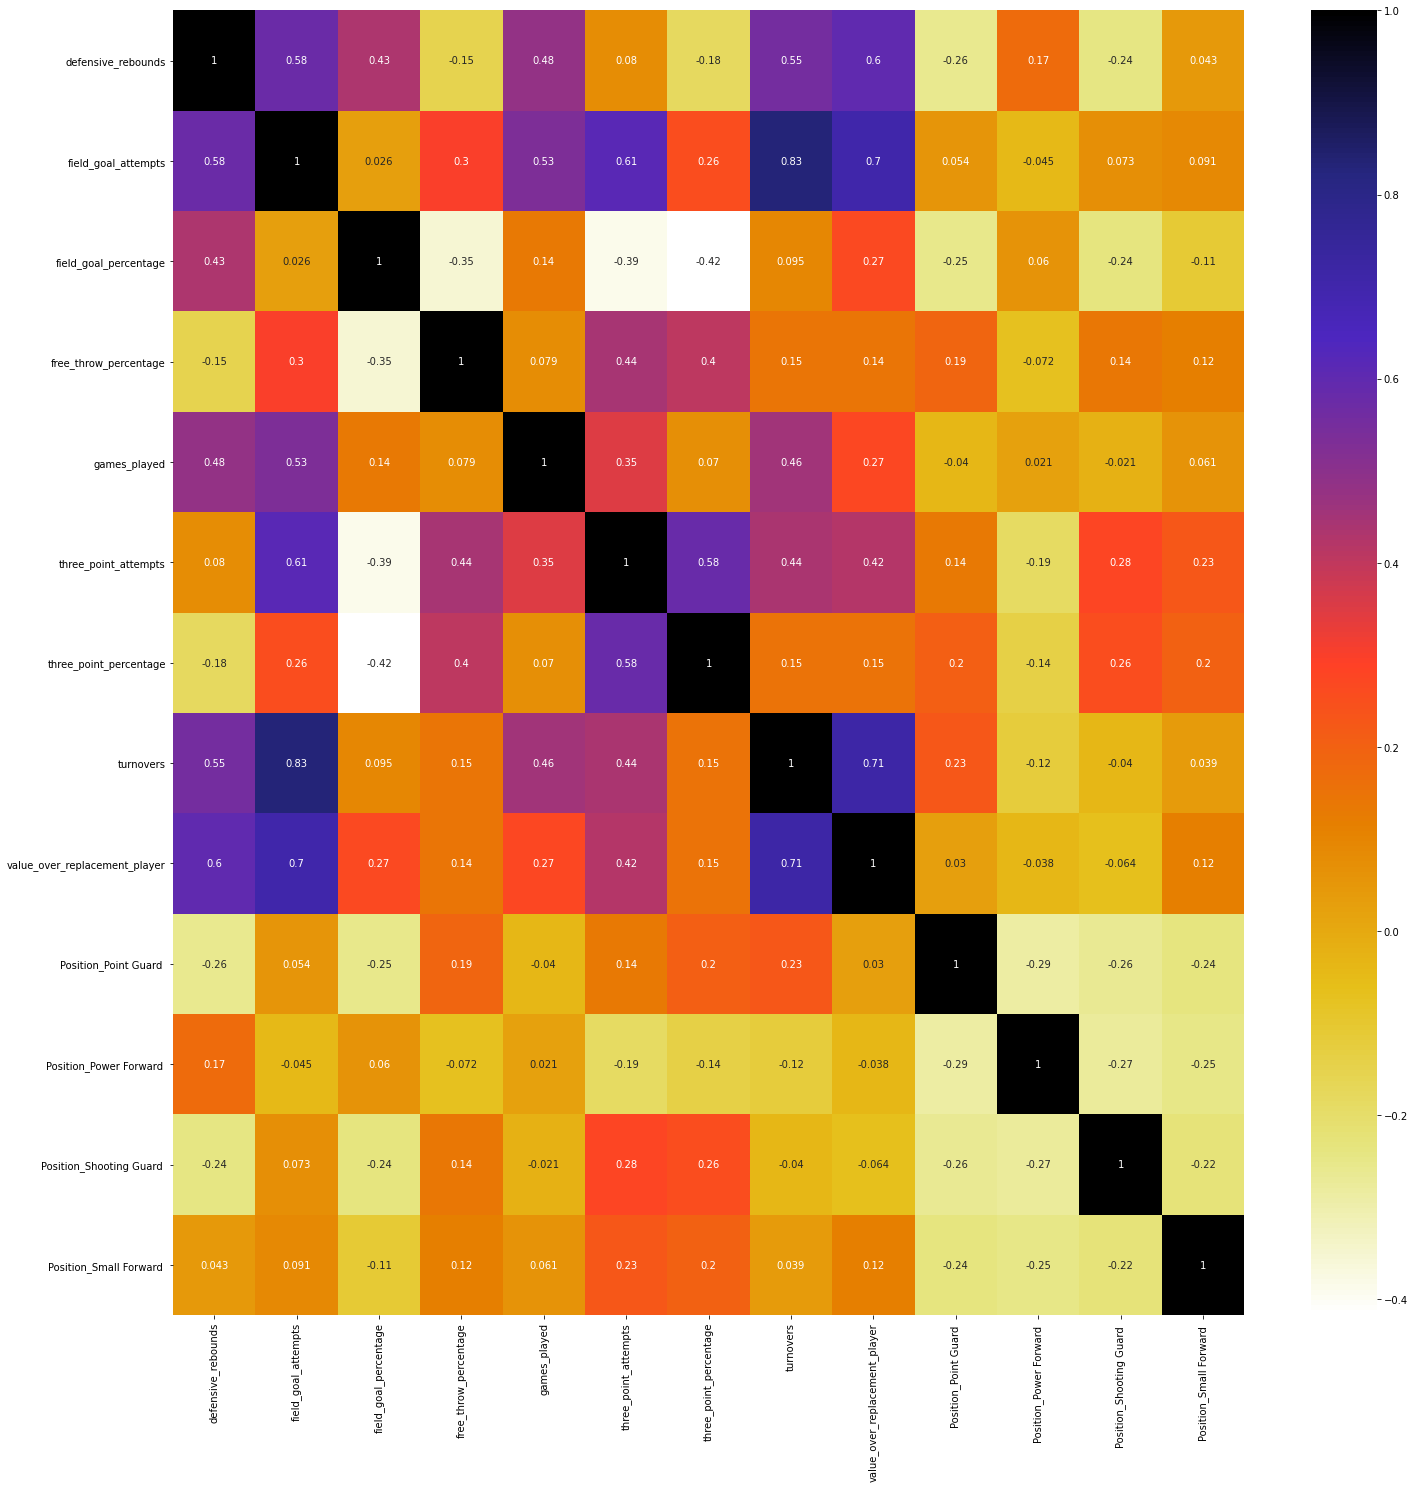

In [382]:
# correlation heatmap // remove if r > 0.7

plt.figure(figsize=(24,24))
sns.heatmap(X.corr(),annot=True,cmap=plt.cm.CMRmap_r)
plt.show()

In [385]:
# list of column name minus catagoreical columsn
X_cols = ['turnovers', 'value_over_replacement_player', 'defensive_rebounds',
       'field_goal_attempts', 'field_goal_percentage', 'free_throw_percentage',
       'games_played', 'three_point_attempts',
       'three_point_percentage']

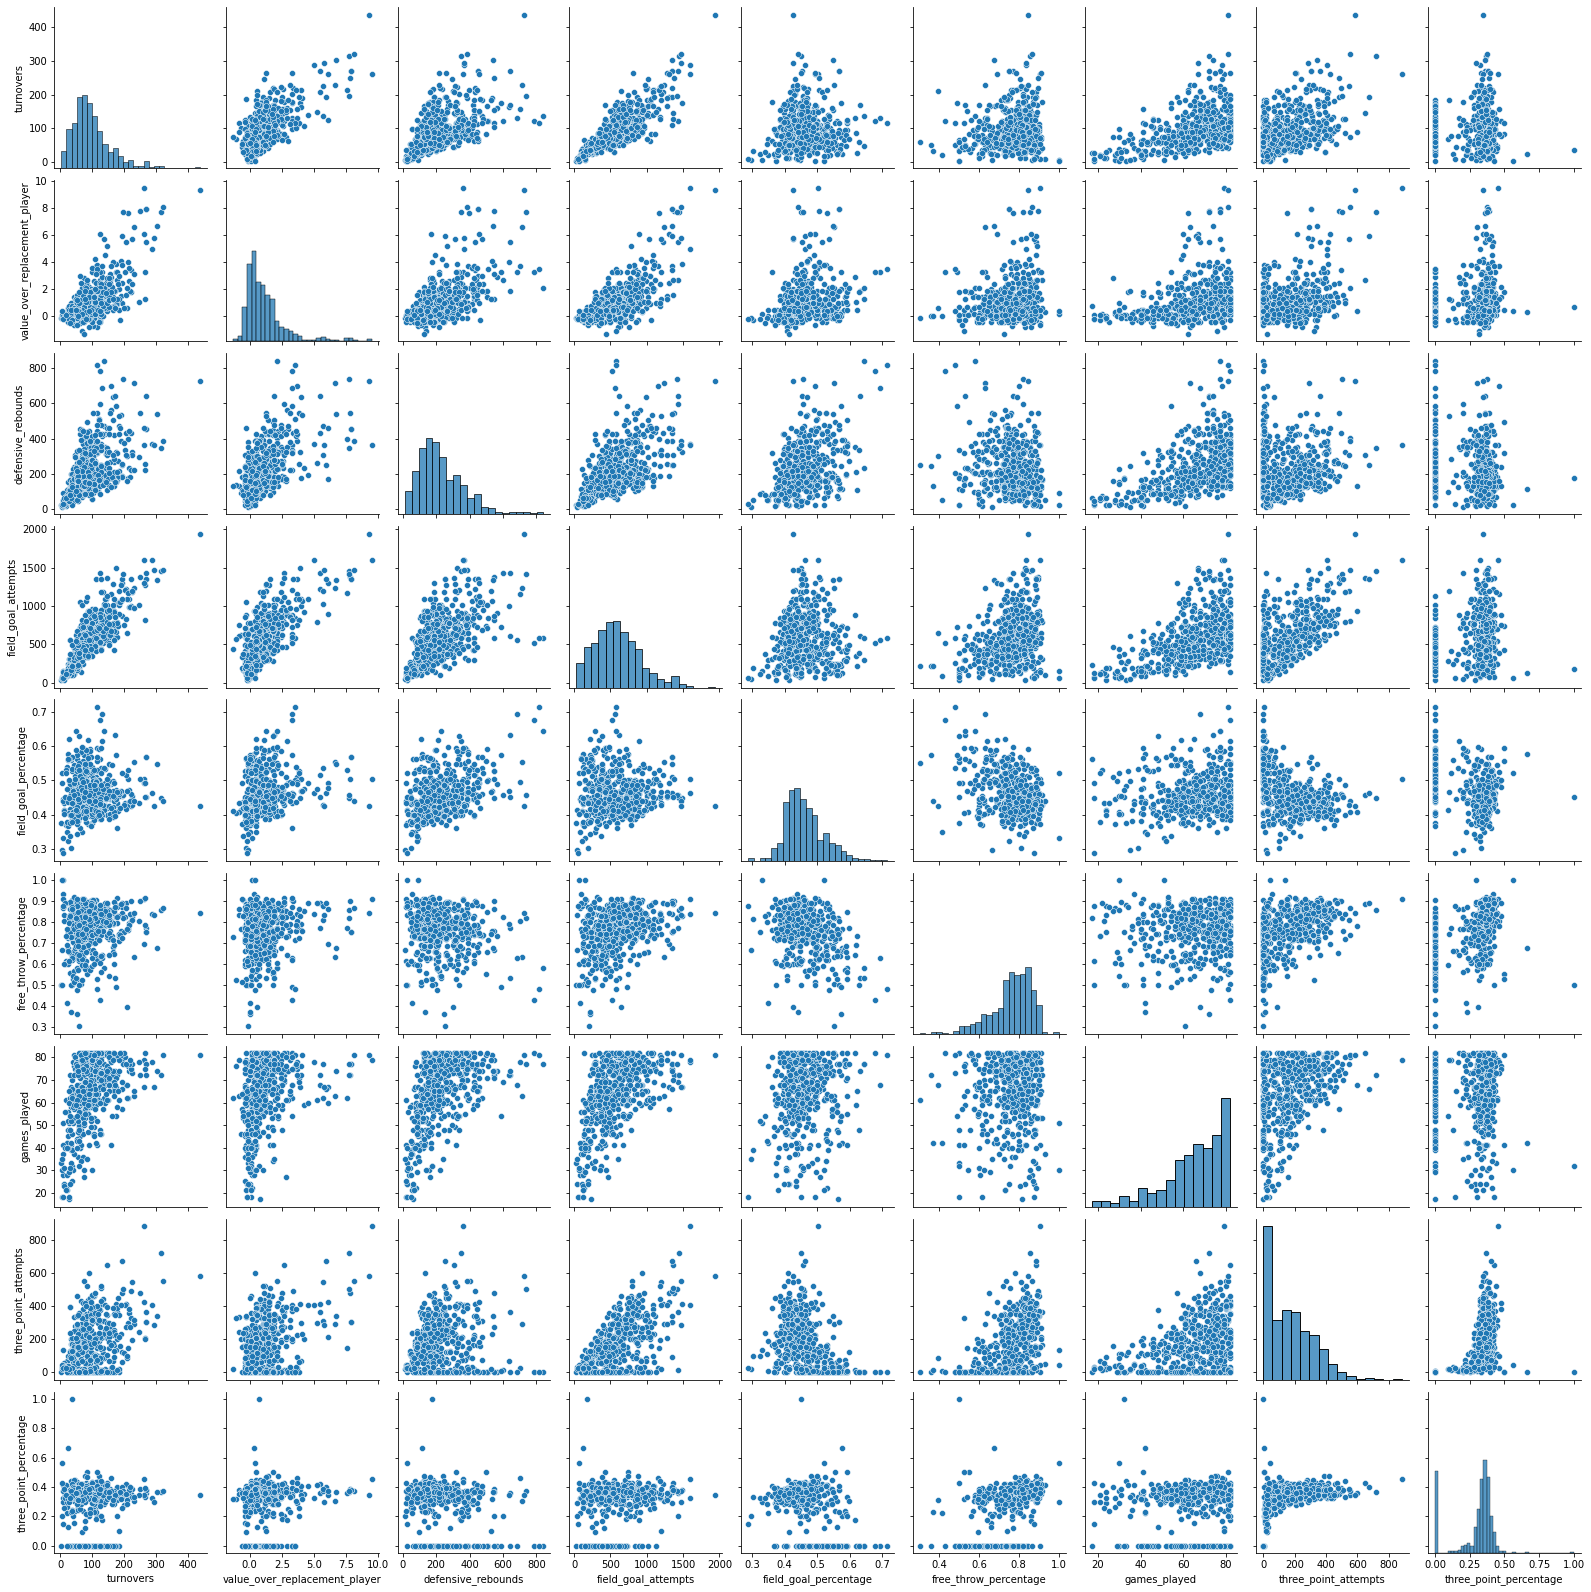

In [386]:
sns.pairplot(X[X_cols])

## Train Test Split

In [387]:
# split data into 80% training 20% testing

X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=.8,shuffle=True,random_state=9)

## Standard Scaler 

In [388]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train = pd.DataFrame(scaler.transform(X_train),columns = X.columns)
X_test = pd.DataFrame(scaler.transform(X_test),columns = X.columns)

In [389]:
X_train.head()

,defensive_rebounds,field_goal_attempts,field_goal_percentage,free_throw_percentage,games_played,three_point_attempts,three_point_percentage,turnovers,value_over_replacement_player,Position_Point Guard,Position_Power Forward,Position_Shooting Guard,Position_Small Forward
0,-0.659992,-0.568427,-1.437400,-0.456414,-0.366788,0.073649,0.668148,0.039990,-0.454744,-0.5225,-0.563436,1.985063,-0.423057
1,-0.596194,-0.687743,0.194185,0.707143,0.483586,-0.121457,0.275183,-0.691937,-0.586669,-0.5225,-0.563436,-0.503762,2.363747
2,0.296970,-1.296883,1.169773,-1.362463,-1.217161,-1.150806,-2.020558,-0.640873,-0.718594,-0.5225,-0.563436,-0.503762,-0.423057
3,0.715198,1.880692,-0.495454,0.592695,1.050502,1.607582,0.385489,1.793213,1.392205,-0.5225,-0.563436,-0.503762,2.363747
4,-1.283789,-1.585753,-0.394531,1.632267,-1.996670,-0.794234,0.840501,-1.508973,-0.586669,-0.5225,-0.563436,-0.503762,2.363747


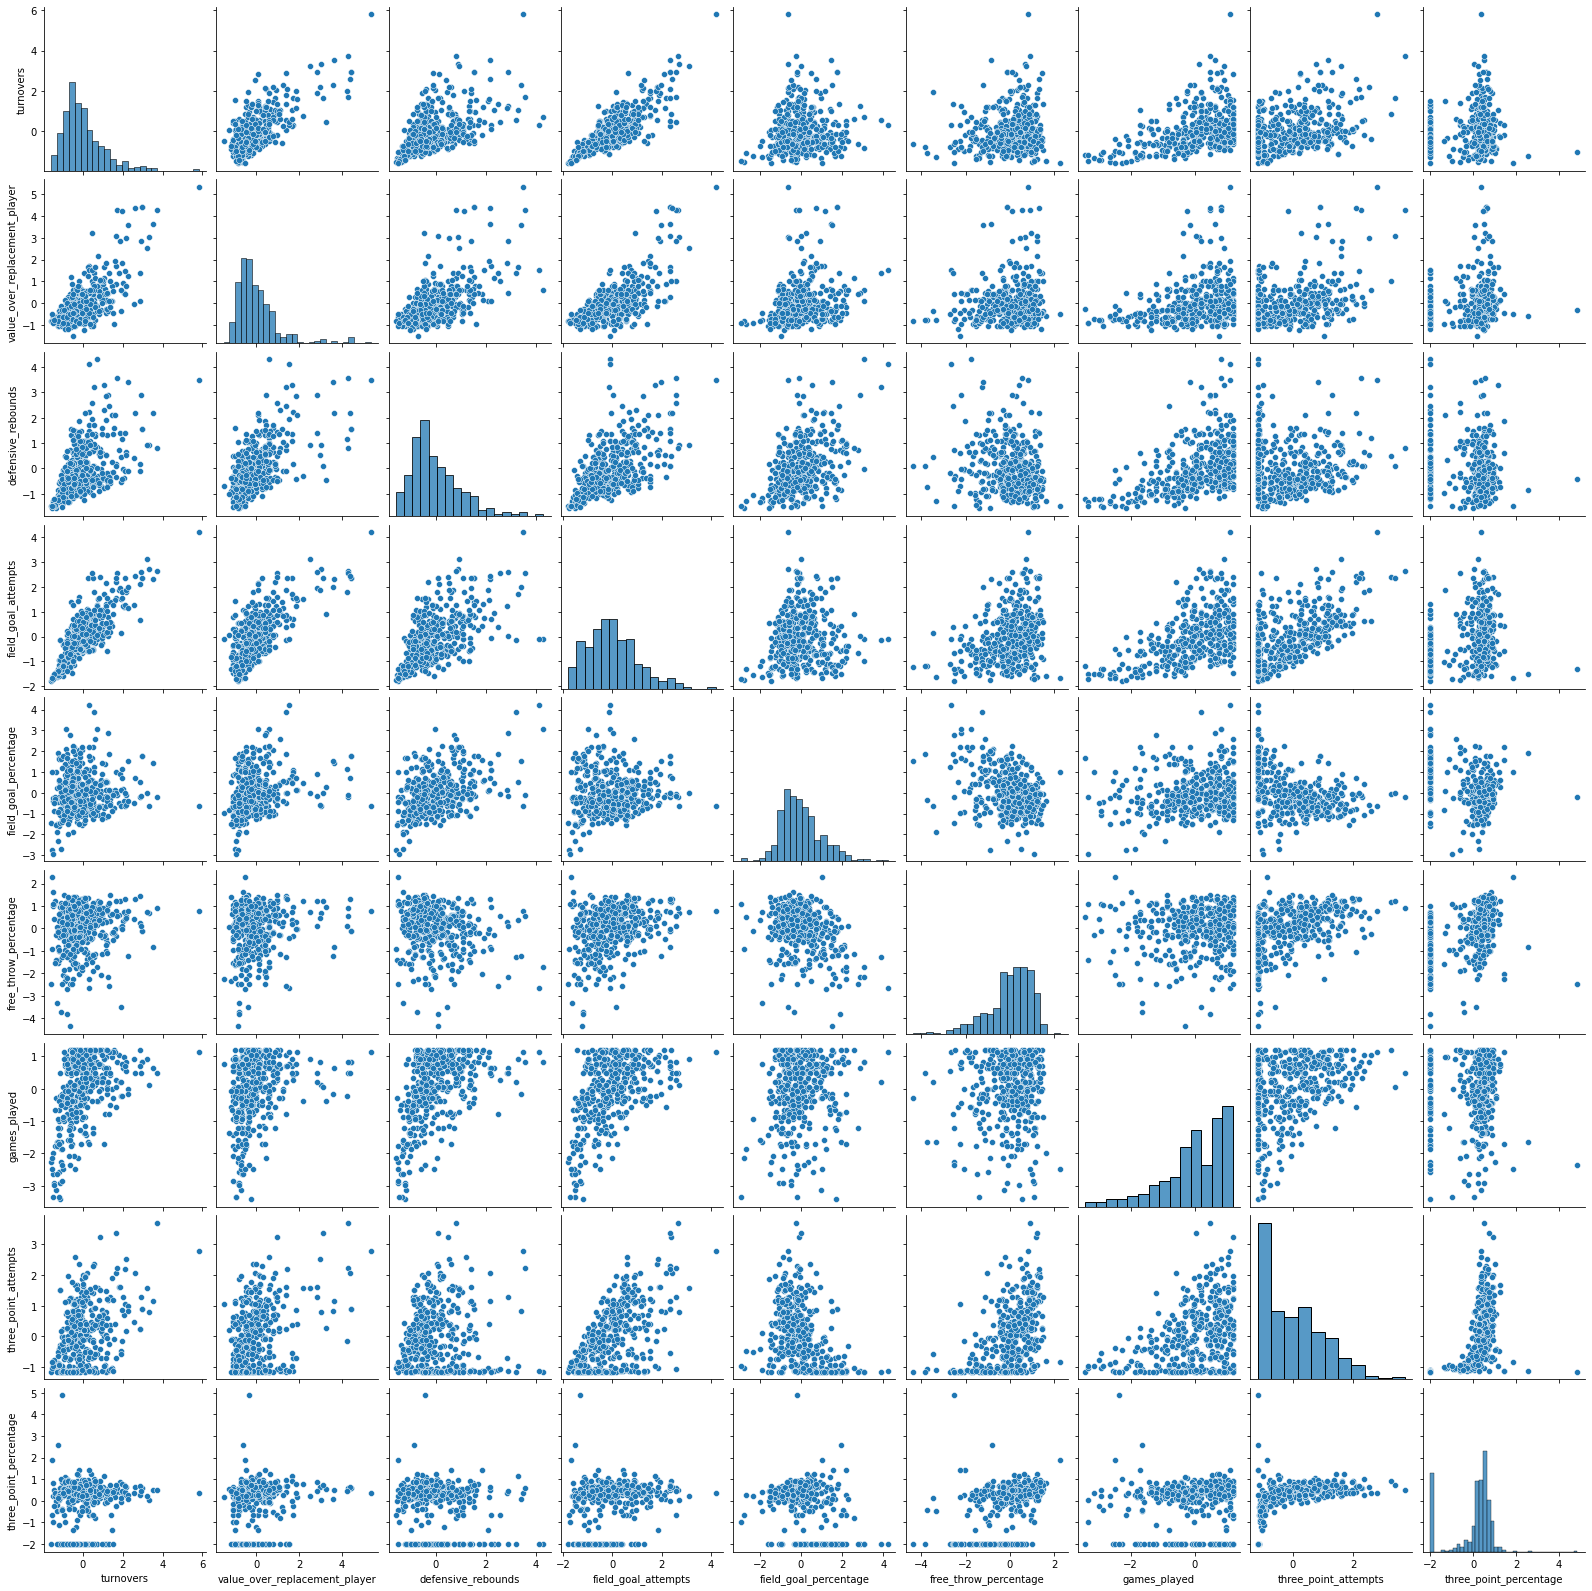

In [390]:
sns.pairplot(X_train[X_cols])

## Linear Regression 

In [436]:
# Create linear regression object
model = LinearRegression()

# Train the model using the training sets
model.fit(X_train,y_train)

# coefficients
linear_model_r2 = model.score(X_test,y_test) 

# predicting AAV using test data
y_pred = model.predict(X_test)

# RMSE// MSE
linear_model_rmse = math.sqrt(mean_squared_error(y_test,y_pred))
linear_model_mse = mean_squared_error(y_test,y_pred)

print(f'R2 : {linear_model_r2} \nRMSE : {linear_model_rmse}\nMSE : {linear_model_mse}')

R2 : 0.5314062274347852 
RMSE : 6.289695948867414
MSE : 39.560275129199155


First Attemp at Linear Regression model I had an R2 of 0.45

In [437]:
pd.DataFrame(model.fit(X_train,y_train).coef_,index=X_train.columns,columns=['Coef_'])

,Coef_
defensive_rebounds,0.853586
field_goal_attempts,1.858150
field_goal_percentage,2.065458
free_throw_percentage,-0.703148
games_played,-2.838771
three_point_attempts,2.906171
three_point_percentage,-0.108294
turnovers,1.081484
value_over_replacement_player,2.520483
Position_Point Guard,0.025972


In [446]:
X_test_copy = X_test.copy()
X_test_copy['Name'] = list(one_year_stat.iloc[y_test.index]['Name'])
X_test_copy['Actual AAV'] = y_test.values
X_test_copy['Predicted AAV'] = y_pred

qwer = X_test_copy[['Name','Actual AAV','Predicted AAV']].copy()
qwer['Difference'] = qwer['Actual AAV'] - qwer['Predicted AAV']

qwer.sort_values('Difference',ascending=False).iloc[:4]

,Name,Actual AAV,Predicted AAV,Difference
42,Chris Paul,39.932648,21.767413,18.165235
57,Khris Middleton,35.500000,17.533076,17.966924
85,Jimmy Butler,35.197650,18.610103,16.587547
67,Al Horford,28.331557,16.359265,11.972292


In [439]:
qwer.sort_values('Difference',ascending=True).iloc[:3]

,Name,Actual AAV,Predicted AAV,Difference
47,Paul Pierce,5.424363,20.858226,-15.433863
53,Marc Gasol,2.628872,16.335233,-13.706361
7,Vince Carter,4.088019,15.150078,-11.062059


## Random Forest Regression

In [440]:
# Random Forest Regressor object
RFReg = RandomForestRegressor(n_estimators= 500 , random_state=0)

# Fit trainign data to RFR
RFReg.fit(X_train,y_train)

#predicing AAV
y_pred_rfr = RFReg.predict((X_test))

In [441]:
# RMSE// MSE
RFR_model_rmse = math.sqrt(mean_squared_error(y_test,y_pred_rfr))
RFR_model_mse = mean_squared_error(y_test,y_pred_rfr)


print(f'R2 : {r2_score(y_test, y_pred_rfr)} \nRMSE : {RFR_model_rmse}\nMSE : {RFR_model_mse}')


R2 : 0.5738652632565411 
RMSE : 5.997977939300073
MSE : 35.97573936033035


In [445]:
X_test_copy = X_test.copy()
X_test_copy['Name'] = list(one_year_stat.iloc[y_test.index]['Name'])
X_test_copy['Actual AAV'] = y_test.values
X_test_copy['Predicted AAV'] = y_pred_rfr

X_test_copy[['Name','Actual AAV','Predicted AAV']]
qwer = X_test_copy[['Name','Actual AAV','Predicted AAV']].copy()
qwer['Difference'] = qwer['Actual AAV'] - qwer['Predicted AAV']

qwer.sort_values('Difference',ascending=False).iloc[:3]

,Name,Actual AAV,Predicted AAV,Difference
57,Khris Middleton,35.500000,16.822292,18.677708
42,Chris Paul,39.932648,24.039802,15.892846
85,Jimmy Butler,35.197650,19.524291,15.673359


In [443]:
qwer.sort_values('Difference',ascending=True).iloc[:3]

,Name,Actual AAV,Predicted AAV,Difference
37,Jason Kidd,3.030000,21.108505,-18.078505
52,Manu Ginobili,7.250000,22.500297,-15.250297
47,Paul Pierce,5.424363,20.652316,-15.227953


## XGB Regressor

In [416]:
xgb_model = XGBRegressor()
xgb_model.fit(X_train,y_train)

# y_pred_xgb = xgb_model.
xgb_model_r2 = xgb_model.score(X_test,y_test)
xgb_model_r2

# RMSE// MSE
RFR_model_rmse = math.sqrt(mean_squared_error(y_test,y_pred_rfr))
RFR_model_mse = mean_squared_error(y_test,y_pred_rfr)


print(f'R2 : {xgb_model_r2}')


R2 : 0.5490565179317077


## Group Contract by year

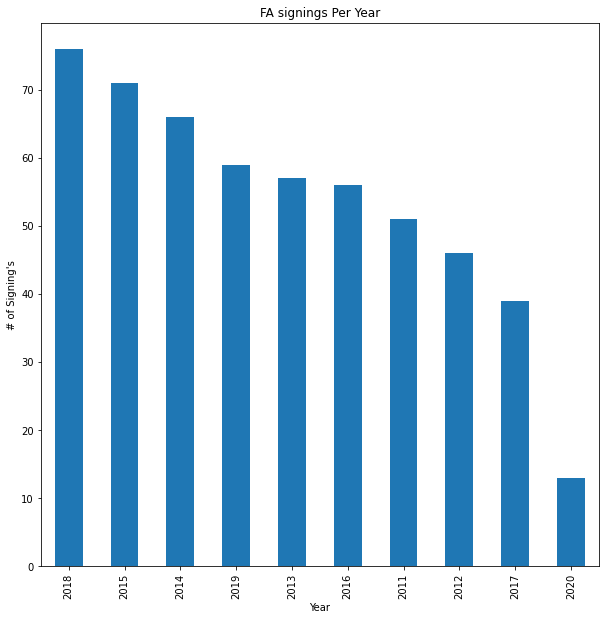

In [400]:
plt.figure(figsize=(10,10))
one_year_stat.Contract_Begin.value_counts().plot(kind='bar')
plt.ylabel("# of Signing's")
plt.xlabel('Year');
plt.title("FA signings Per Year")

plt.savefig('FA signings Per Year');

In [401]:
# 2018

data_2018 = one_year_stat[one_year_stat.Contract_Begin == 2018]

In [402]:
data_2018

,Name,AAV,Player_id,Position,Contract_Begin,assists,blocks,box_plus_minus,defensive_rebounds,field_goal_attempts,field_goal_percentage,field_goals,free_throw_attempts,free_throw_percentage,free_throws,games_played,games_started,height,lost_ball_turnovers,minutes_played,net_plus_minus,offensive_rebounds,personal_fouls,player_efficiency_rating,points,shooting_fouls,steals,three_point_attempts,three_point_percentage,three_pointers,total_rebounds,true_shooting_percentage,turnovers,two_point_attempts,two_pointers,usage_percentage,value_over_replacement_player,weight
6,LaMarcus Aldridge,25000000,aldrila01,Power Forward,2018,152.0,90.0,3.9,389.0,1347.0,0.510,687.0,399.0,0.837,334.0,75.0,75.0,6-11,NaN,2509.0,NaN,246.0,161.0,25.0,1735.0,NaN,43.0,92.0,0.293,27.0,635.0,0.570,111.0,1255.0,660.0,29.1,3.7,250
9,Al-Farouq Aminu,9720900,aminual01,Power Forward,2018,84.0,40.0,0.4,428.0,582.0,0.395,230.0,80.0,0.738,59.0,69.0,67.0,6-8,NaN,2072.0,NaN,97.0,136.0,12.0,644.0,NaN,79.0,339.0,0.369,125.0,525.0,0.522,79.0,243.0,105.0,14.8,1.3,220
17,Ryan Arcidiacono,3000000,arcidry01,Point Guard,2018,35.0,0.0,-4.1,24.0,41.0,0.415,17.0,6.0,0.833,5.0,24.0,0.0,6-3,NaN,304.0,NaN,1.0,18.0,7.3,48.0,NaN,13.0,31.0,0.290,9.0,25.0,0.550,13.0,10.0,8.0,8.1,-0.2,195
19,Trevor Ariza,12500000,arizatr01,Small Forward,2018,105.0,13.0,0.7,261.0,651.0,0.412,268.0,89.0,0.854,76.0,67.0,67.0,6-8,NaN,2269.0,NaN,33.0,132.0,11.8,782.0,NaN,98.0,462.0,0.368,170.0,294.0,0.567,52.0,189.0,98.0,14.4,1.5,215
48,Patrick Beverley,13333327,beverpa01,Point Guard,2018,32.0,5.0,0.5,29.0,119.0,0.403,48.0,17.0,0.824,14.0,11.0,11.0,6-1,NaN,334.0,NaN,16.0,34.0,12.4,134.0,NaN,19.0,60.0,0.400,24.0,45.0,0.530,25.0,59.0,24.0,19.6,0.2,180
51,Khem Birch,3000000,birchkh01,Power Forward,2018,34.0,21.0,-0.9,110.0,126.0,0.540,68.0,61.0,0.689,42.0,42.0,0.0,6-9,NaN,578.0,NaN,70.0,56.0,16.4,178.0,NaN,15.0,0.0,NaN,0.0,180.0,0.582,21.0,126.0,68.0,13.2,0.2,233
55,Eric Bledsoe,17500000,bledser01,Point Guard,2018,370.0,42.0,2.5,233.0,989.0,0.473,468.0,317.0,0.795,252.0,74.0,74.0,6-1,NaN,2322.0,NaN,51.0,185.0,19.7,1313.0,NaN,149.0,360.0,0.347,125.0,284.0,0.582,216.0,629.0,343.0,26.1,2.6,214
58,Bojan Bogdanovic,18275000,bogdabo02,Small Forward,2018,119.0,8.0,-0.7,240.0,852.0,0.474,404.0,205.0,0.868,178.0,80.0,80.0,6-7,NaN,2464.0,NaN,30.0,129.0,13.9,1141.0,NaN,55.0,386.0,0.402,155.0,270.0,0.605,106.0,466.0,249.0,19.0,0.8,226
66,Avery Bradley,4886175,bradlav01,Point Guard,2018,94.0,8.0,-4.0,94.0,625.0,0.414,259.0,82.0,0.768,63.0,46.0,46.0,6-3,NaN,1433.0,NaN,22.0,92.0,9.6,656.0,NaN,51.0,203.0,0.369,75.0,116.0,0.496,101.0,422.0,184.0,23.5,-0.7,180
71,Malcolm Brogdon,21250000,brogdma01,Point Guard,2018,152.0,13.0,-1.2,133.0,503.0,0.485,244.0,85.0,0.882,75.0,48.0,20.0,6-5,NaN,1436.0,NaN,23.0,128.0,14.3,625.0,NaN,41.0,161.0,0.385,62.0,156.0,0.578,66.0,342.0,182.0,19.1,0.3,229


In [403]:
FA_data_2018, FA_AAV_2018 = preprocess_data(data_2018)
FA_data_2018

,defensive_rebounds,field_goal_attempts,field_goal_percentage,free_throw_percentage,games_played,three_point_attempts,three_point_percentage,turnovers,value_over_replacement_player,Position_Point Guard,Position_Power Forward,Position_Shooting Guard,Position_Small Forward
6,389.0,1347.0,0.510,0.837,75.0,92.0,0.293,111.0,3.7,0,1,0,0
9,428.0,582.0,0.395,0.738,69.0,339.0,0.369,79.0,1.3,0,1,0,0
17,24.0,41.0,0.415,0.833,24.0,31.0,0.290,13.0,-0.2,1,0,0,0
19,261.0,651.0,0.412,0.854,67.0,462.0,0.368,52.0,1.5,0,0,0,1
51,110.0,126.0,0.540,0.689,42.0,0.0,0.000,21.0,0.2,0,1,0,0
55,233.0,989.0,0.473,0.795,74.0,360.0,0.347,216.0,2.6,1,0,0,0
58,240.0,852.0,0.474,0.868,80.0,386.0,0.402,106.0,0.8,0,0,0,1
66,94.0,625.0,0.414,0.768,46.0,203.0,0.369,101.0,-0.7,1,0,0,0
71,133.0,503.0,0.485,0.882,48.0,161.0,0.385,66.0,0.3,1,0,0,0
78,127.0,546.0,0.489,0.796,62.0,281.0,0.445,47.0,1.2,0,0,0,1


In [404]:
# split data into 80% training 20% testing

X_train_2018,X_test_2018,y_train_2018,y_test_2018 = train_test_split(FA_data_2018, FA_AAV_2018,train_size=.8,shuffle=True,random_state=123)

# standardize data
scaler = StandardScaler()
scaler.fit(X_train_2018)

X_train_2018 = pd.DataFrame(scaler.transform(X_train_2018),columns = FA_data_2018.columns)
X_test_2018 = pd.DataFrame(scaler.transform(X_test_2018),columns = FA_data_2018.columns)


In [405]:
X_train_2018

,defensive_rebounds,field_goal_attempts,field_goal_percentage,free_throw_percentage,games_played,three_point_attempts,three_point_percentage,turnovers,value_over_replacement_player,Position_Point Guard,Position_Power Forward,Position_Shooting Guard,Position_Small Forward
0,-0.967068,-1.403060,1.052473,0.232513,-1.429464,-1.268689,-2.598186,-1.010767,-0.569262,-0.617213,-0.339683,-0.4,-0.590624
1,1.296712,-0.111307,-1.192840,-0.384482,0.356083,0.749022,0.413914,-0.266714,0.031051,-0.617213,2.943920,-0.4,-0.590624
2,0.539846,-0.391087,-0.191333,-0.571785,-0.477172,-0.512791,0.169028,-0.318624,-0.902768,-0.617213,2.943920,-0.4,-0.590624
3,1.289894,0.397656,0.325573,0.111318,0.534638,0.076452,0.903686,0.650375,1.631883,-0.617213,2.943920,-0.4,-0.590624
4,-0.189746,0.141686,0.390187,-1.365064,-0.001026,-0.721109,0.062910,1.273304,-0.302456,1.620185,-0.339683,-0.4,-0.590624
5,-0.817058,0.552428,-0.724394,-1.442189,-0.120063,0.874013,0.487380,0.252393,-0.569262,1.620185,-0.339683,-0.4,-0.590624
6,0.962600,0.457184,0.535567,-1.695598,0.594156,-1.197265,-0.557468,0.252393,-0.169053,-0.617213,-0.339683,-0.4,-0.590624
7,-0.789784,-1.132208,1.617840,-1.508296,-0.655727,-1.256785,-2.598186,-0.976160,-0.702664,-0.617213,-0.339683,-0.4,-0.590624
8,1.051242,-0.974460,1.827834,-1.166744,0.891747,-1.262737,-2.598186,-0.491660,-0.502560,-0.617213,-0.339683,-0.4,-0.590624
9,1.330805,1.793583,0.761713,1.279202,0.296565,1.189466,0.822058,1.948143,2.832507,-0.617213,-0.339683,-0.4,1.693123


In [406]:
# Create linear regression object
model_2018 = LinearRegression()

# Train the model using the training sets
model_2018.fit(X_train_2018,y_train_2018)

# coefficients
linear_model_r2 = model_2018.score(X_test_2018,y_test_2018) 

# predicting AAV using test data
y_pred_2018 = model_2018.predict(X_test_2018)

# RMSE
linear_model_rmse = math.sqrt(mean_squared_error(y_test_2018,y_pred_2018))
linear_model_mse = mean_squared_error(y_test_2018,y_pred_2018)

print(f'R2 : {linear_model_r2} \nRMSE : {linear_model_rmse}\nMSE : {linear_model_mse}')

R2 : -0.023678714056027728 
RMSE : 5.484363466565487
MSE : 30.0782426333982


In [407]:
X_test_2018_copy = X_test_2018.copy()
X_test_2018_copy['Name'] = list(one_year_stat.iloc[y_test_2018.index]['Name'])
X_test_2018_copy['Actual AAV'] = y_test_2018.values
X_test_2018_copy['Predicted AAV'] = y_pred_2018



In [408]:
X_test_2018_copy[['Name','Actual AAV','Predicted AAV']]

,Name,Actual AAV,Predicted AAV
0,Thaddeus Young,14.545000,14.076280
1,Mike Muscala,2.155814,11.702633
2,Terrence Ross,13.500000,5.333588
3,Marcus Morris Sr.,15.000000,12.692236
4,Markieff Morris,6.560000,13.577345
5,Mike Scott,4.900000,8.679246
6,Jonas Valanciunas,15.000000,15.737732
7,Taj Gibson,10.000000,12.355589
8,Malcolm Brogdon,21.250000,11.826769
9,Khem Birch,3.000000,5.146436


## Future Work // Improvements 

- Better Data collection // The data collected were of every NBA contract sign in the past decade (2011-2020). Since the motivation of the project is to predict free agents salary based on their performance of the previous year(s), contract such a rookie deal, free agent pick up can mess with the data.

- Players average for the past ~3 years instead of just one.

